# **Nural Network From Scrach**
NN consists of:

1-Layers: input layer, one {binary classification} or more {multiclass classificatio} hidden layers, and an output layer.

2-Nodes: num of nodes == num of features in the MNIST . Hidden layers == variable, output layer == 10 nodes.


Here: it is multiclass classification, thus I'll use Activation function "RELU" &  softmax for output layer


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

# Activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

In [10]:
# Derivatives of activation functions
def relu_derivative(x):
    return (x > 0).astype(float)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss

def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]


In [11]:
import numpy as np


def relu(x):
  """ReLU activation function."""
  return np.maximum(0, x)


def softmax(x):
  """Softmax activation function."""
  e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return e_x / np.sum(e_x, axis=1, keepdims=True)


def relu_derivative(x):
  """Derivative of ReLU activation function."""
  return (x > 0).astype(float)


def cross_entropy(y_true, y_pred):
  """Cross-entropy loss function."""
  m = y_true.shape[0]
  loss = -np.sum(y_true * np.log(y_pred)) / m
  return loss


def one_hot_encode(y, num_classes=10):
  """One-hot encode target labels."""
  return np.eye(num_classes)[y]


class NeuralNetwork:
  def __init__(self, input_size, hidden_sizes, output_size):
    """
    Initialize the neural network with layers and weights.

    Args:
      input_size: Size of the input layer.
      hidden_sizes: List of sizes for hidden layers.
      output_size: Size of the output layer.
    """
    self.input_size = input_size
    self.hidden_sizes = hidden_sizes
    self.output_size = output_size

    self.layers = [input_size] + hidden_sizes + [output_size]
    self.num_layers = len(self.layers)

    self.weights = []
    self.biases = []

    # Initialize weights with small random values
    for i in range(self.num_layers - 1):
      self.weights.append(np.random.randn(self.layers[i], self.layers[i + 1]) * 0.01)
      self.biases.append(np.zeros((1, self.layers[i + 1])))

  def feedforward(self, x):
    """
    Perform a forward pass through the network.

    Args:
      x: Input data.

    Returns:
      activations: List of activations for each layer.
      pre_activations: List of values before activation for each layer.
    """
    activations = [x]
    pre_activations = []

    # Forward propagation through hidden layers
    for i in range(self.num_layers - 2):
      z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
      pre_activations.append(z)
      activations.append(relu(z))

    # Output layer with softmax
    z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
    pre_activations.append(z)
    activations.append(softmax(z))

    return activations, pre_activations

    def backpropagation(self, activations, pre_activations, y_true):

      m = y_true.shape[0]
      grads = {"dW": [], "dB": []}

      # Output layer gradients
      y_pred = activations[-1]
      dz = y_pred - y_true
      dW = np.dot(activations[-2].T, dz) / m
      dB = np.sum(dz, axis=0, keepdims=True) / m

      grads["dW"].append(dW)
      grads["dB"].append(dB)

      # Backward propagation through hidden layers
      for i in range(self.num_layers - 3, -1, -1):
        dz = np.dot(dz, self.weights[i + 1].T) * relu_derivative(pre_activations[i])
        dW = np.dot(activations[i].T, dz) / m
        dB = np.sum(dz, axis=0, keepdims=True) / m
        grads["dW"].append(dW)
        grads["dB"].append(dB)

      # Reverse the gradients to match the weights order
      grads["dW"].reverse()
      grads["dB"].reverse()

      return grads


In [12]:
# Load the MNIST dataset
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



In [13]:
# Normalize and reshape the input data
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

# One-hot encode the target data
y_train_oh = one_hot_encode(y_train, 10)
y_test_oh = one_hot_encode(y_test, 10)


In [14]:
# Initialize the neural network
nn = NeuralNetwork(input_size=28 * 28, hidden_sizes=[64, 32], output_size=10)

# Train the neural network
nn.train(x_train, y_train_oh, epochs=100, learning_rate=0.1)

AttributeError: 'NeuralNetwork' object has no attribute 'train'

In [15]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the test set
accuracy = nn.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.1135


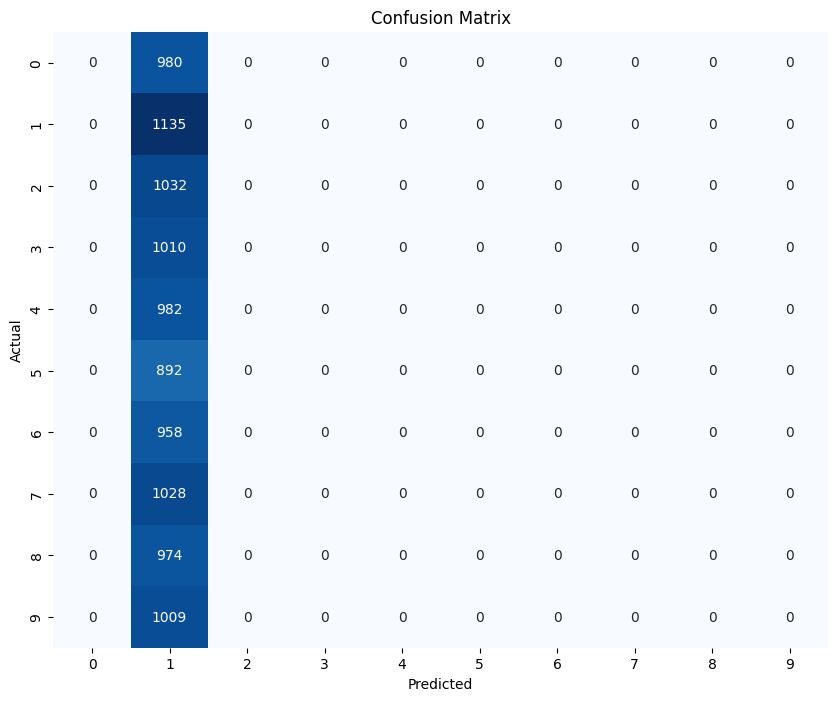

In [2]:

# Generate the confusion matrix
y_pred = nn.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()